In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import seaborn as sns

## Данные

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Логистическая регрессия

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

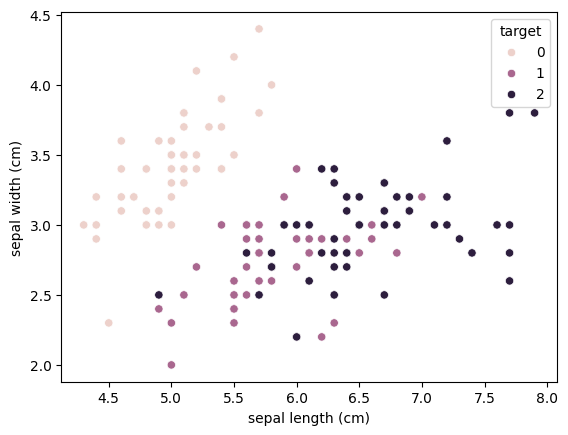

In [ ]:
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], hue=iris_df['target'])

In [ ]:
train_X = iris_df[iris_df['target'].isin([0, 1])][['sepal length (cm)', 'sepal width (cm)']]
train_y = iris_df[iris_df['target'].isin([0, 1])]['target']

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

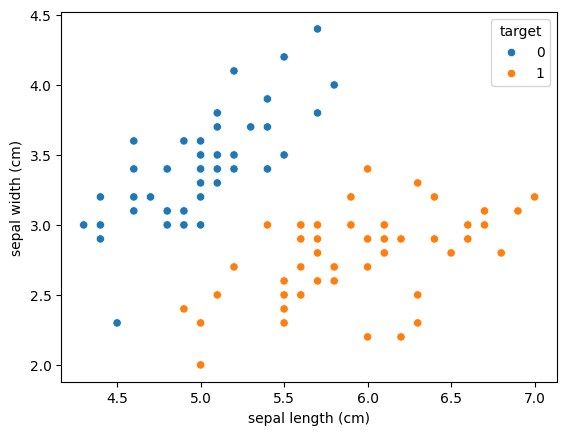

In [ ]:
sns.scatterplot(x=train_X['sepal length (cm)'], y=train_X['sepal width (cm)'], hue=train_y)

Логистическая функция
 $\sigma(z) = \frac{1}{1 + \exp^{-z}}$
Ищем решение в виде  
$f(x,b)=b_0+b_1 x_1+b_2 x_2+...+b_k x_k$  
$y = \sigma(f(x, b))$  

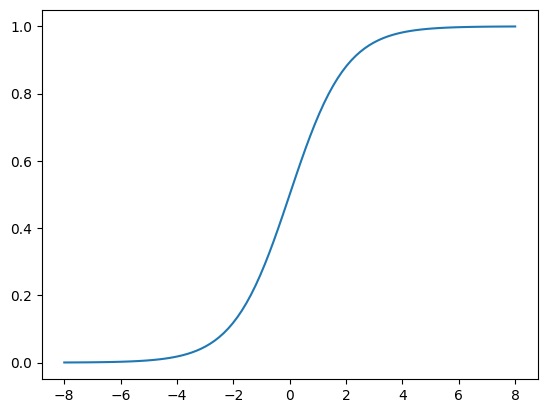

In [ ]:
X = np.linspace(-8, 8, 100)
plt.plot(X, 1/(1+np.exp(-X)))

Оптимизируем логистическую функцию потерь  
${L} (\textbf X, \textbf{y}, \textbf{b}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i \dot f(x_i, b)})$

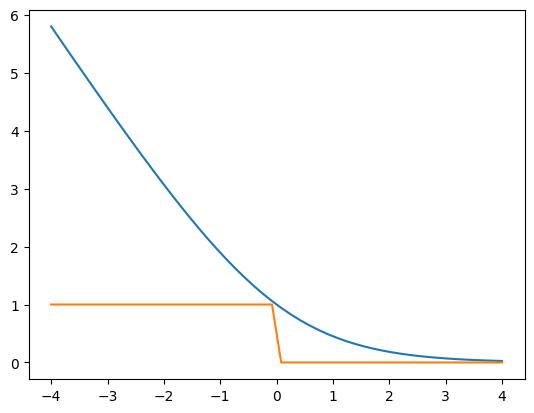

In [ ]:
X = np.linspace(-4, 4)
plt.plot(X, np.log2(1+np.exp(-X)))
plt.plot(X, (-np.sign(X)+1)/2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

LogisticRegression()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

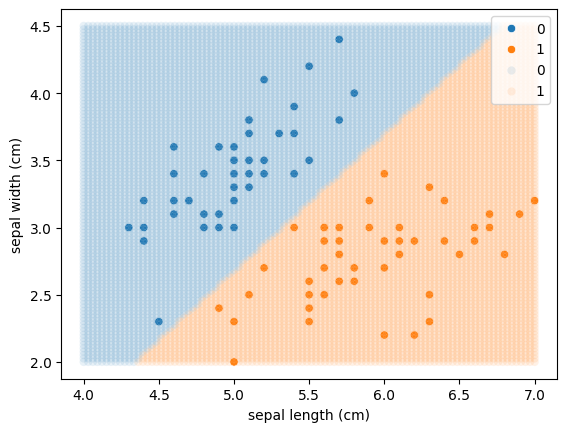

In [ ]:
_x = np.linspace(4, 7, 100)
_y = np.linspace(2, 4.5, 100)
xv, yv = np.meshgrid(_x, _y)
grid = np.vstack([xv.flatten(), yv.flatten()]).T
_pred = logreg.predict(grid)

sns.scatterplot(x=train_X['sepal length (cm)'], y=train_X['sepal width (cm)'], hue=train_y)
sns.scatterplot(x=grid[:,0], y=grid[:,1], hue=_pred, alpha=0.1)


## Регуляризация

In [ ]:
train_X = np.linspace(-5, 5, 20).reshape(-1, 1)
train_y = np.hstack([np.zeros(10), np.ones(10)])

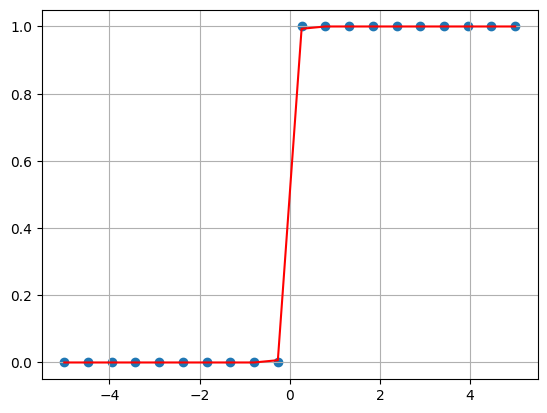

In [ ]:
plt.scatter(train_X, train_y)
logreg = LogisticRegression(C=10000)
logreg.fit(train_X, train_y)
plt.plot(train_X, logreg.predict_proba(train_X)[:,1], c='r')
plt.grid()

[[0.18266487]]
[[0.63505381]]
[[1.46710291]]
[[3.2178808]]
[[7.27455959]]


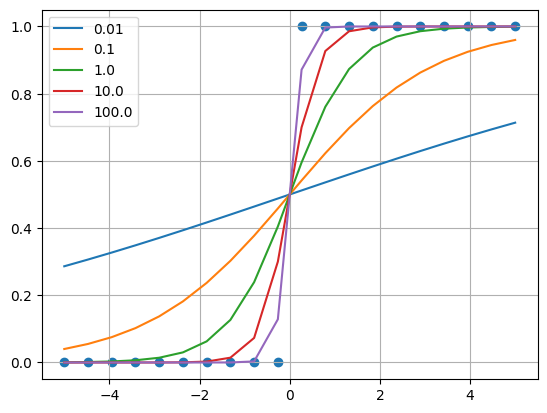

In [ ]:
plt.scatter(train_X, train_y)
plt.grid()
for C in np.logspace(-2, 2, 5):
    logreg = LogisticRegression(C=C)
    logreg.fit(train_X, train_y)
    plt.plot(train_X, logreg.predict_proba(train_X)[:,1], label=C)
    print(logreg.coef_)
plt.legend()

Lasso регуляризатор
${L} (\textbf X, \textbf{y}, \textbf{b}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i \dot f(x_i, b)}) + \sum_{i=1}^n |b_i|$

Ridge регуляризатов
${L} (\textbf X, \textbf{y}, \textbf{b}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i \dot f(x_i, b)}) + \sum_{i=1}^n b_i^2$

### Коррелированные признаки

In [ ]:
train_X_corr = iris_df[iris_df['target'].isin([0, 1])][['sepal length (cm)', 'sepal width (cm)']]
train_y_corr = iris_df[iris_df['target'].isin([0, 1])]['target']

In [ ]:
train_X_corr['sepal width (cm) 2'] = train_X_corr['sepal width (cm)']*2

In [ ]:
logreg = LogisticRegression(penalty='l1', C=100000000, solver='liblinear')
logreg.fit(train_X_corr, train_y_corr)
logreg.coef_

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[ 23.79036156, -10.05467742,  -5.52486768]])

In [ ]:
logreg = LogisticRegression(penalty='l1', C=1, solver='liblinear')
logreg.fit(train_X_corr, train_y_corr)
logreg.coef_

array([[ 4.01686883,  0.        , -3.51734323]])

In [ ]:
logreg = LogisticRegression(penalty='l2', C=1, solver='liblinear')
logreg.fit(train_X_corr, train_y_corr)
logreg.coef_

array([[ 2.8975458 , -1.00713434, -2.01426867]])

### Комбинирование признаков

In [ ]:
circles_X, circles_y = datasets.make_circles(factor=0.5)
circles_X = pd.DataFrame(circles_X, columns=['x', 'y'])
circles_X['color'] = circles_y

<Axes: xlabel='x', ylabel='y'>

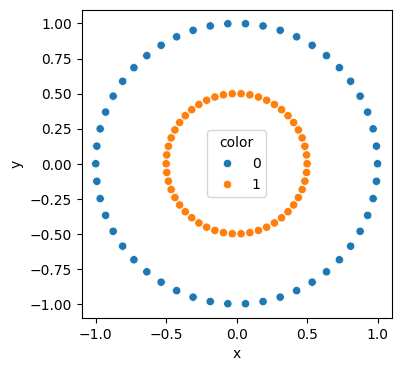

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data = circles_X, x='x', y='y', hue='color')

In [ ]:
def make_polinomial(df):
    df = df.copy()
    df['x_x'] = df['x']**2
    df['y_y'] = df['y']**2
    df['x_y'] = df['x']*df['y']
    return df[['x_x', 'y_y']]

In [ ]:
polinomial_X = make_polinomial(circles_X)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipeline = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(C=100))])
pipeline.fit(polinomial_X, circles_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(C=100))])

In [ ]:
pipeline.predict_proba(polinomial_grid)

array([[1.00000000e+00, 1.46895110e-11],
       [1.00000000e+00, 3.03470716e-11],
       [1.00000000e+00, 6.17725365e-11],
       ...,
       [1.00000000e+00, 6.17725365e-11],
       [1.00000000e+00, 3.03470716e-11],
       [1.00000000e+00, 1.46895110e-11]])

<Axes: xlabel='x', ylabel='y'>

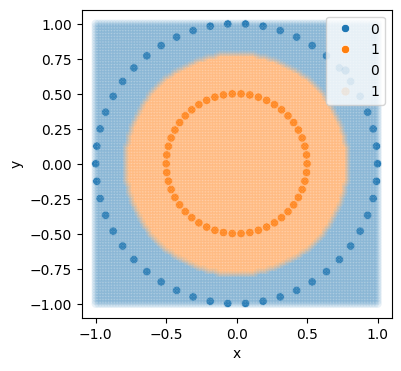

In [ ]:
_x = np.linspace(-1, 1, 100)
_y = np.linspace(-1, 1, 100)
xv, yv = np.meshgrid(_x, _y)
grid = pd.DataFrame(np.vstack([xv.flatten(), yv.flatten()]).T, columns=['x', 'y'])
polinomial_grid = make_polinomial(grid)
_pred = pipeline.predict(polinomial_grid)

plt.figure(figsize=(4, 4))
sns.scatterplot(data = circles_X, x='x', y='y', hue='color')
sns.scatterplot(x=grid['x'], y=grid['y'], hue=_pred, alpha=0.1)

## Дерево принятия решений

Дерево решений - это формализация обычного алгоритма принятия решения на основе простых правил. Например:

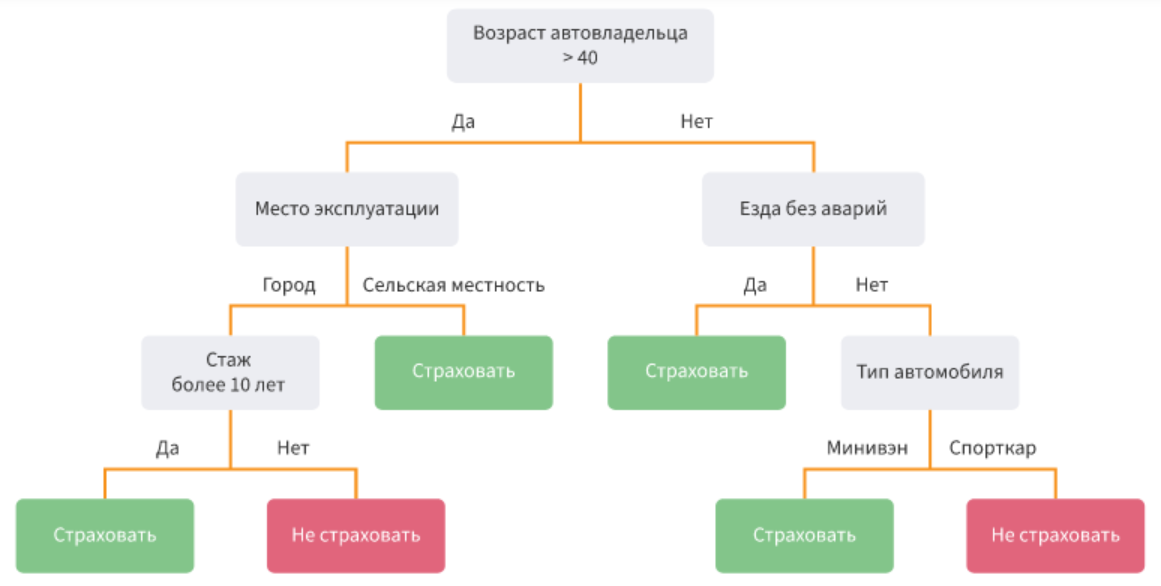

Рекурсивный алгоритм построения дерева:  
Пусть есть некоторая функция $\Large G(Y, Z)$, где $Y$ и $Z$ - любое разбиение некоторой выборки $(X, y)$ на два подмножества. $\Large G$ - критерий качества разбиения. Тогда можем воспользоваться этой функций и рекурсивно построить решающее дерево:

1. Для каждого признака $F_i$ в обучающих данных:
 2. Для каждого значения признака $f^j \in F_i$:
  * Выполняем разбиение обучающей выборки по данному значению на 2 подмножесва. $Y$ - все сэмплы, для которых $F_i < f^j$, $Z$ - для которых $F_i >= f^j$.
  * Для полученного разбиений считаем $\Large G(Y, Z)$ и выбираем разбиение с наименьшим значением.
  * Повторяем операцию 1 для полученных подвыборок $Y, Z$ рекурсивно, пока не выполнен критерий останова.

Оценка качества разбиения:
* Gini impurity = $1 - \sum_{i=1}^n{p_i^2}$, где $p$ - доля объектов, принадлежащих классу $i$.
* Entropy = $-\sum_{i=1}^n{p_i}\log p_i$, где $p$ - доля объектов, принадлежащих классу $i$.

Функции $\Large G(Y, Z)$ - взвешенная сумма выбранной функции по подмножествам:
$\Large G(Y, Z) = \frac{|Y|}{|Y+Z|} Gini(Y) + \frac{|Z|}{|Y+Z|}Gini(Z)$


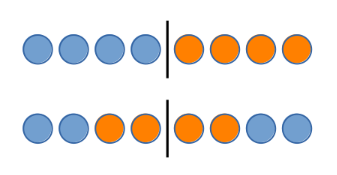

Пример:
1. Идеальная классификация. В Y все объекты класса 0, в Z - класса 1. Тогда gini impurity для классов равна $1 - (1^2 + 0^2) = 0$.  
Следовательно и $\Large G(Y, Z) = 0$.
2. Случайное разбиение. В Y и Z поровну объектов класса 0 и 1. Gini impurity = $1 - (\frac{1}{2}^2 + \frac{1}{2}^2) = \frac{1}{2}$.  
$\Large G(Y, Z) = \frac{4}{8} \frac{1}{2} + \frac{4}{8} \frac{1}{2} = \frac{1}{2}$

In [ ]:
train_X = iris_df[iris_df['target'].isin([0, 1])][['sepal length (cm)', 'sepal width (cm)']]
train_y = iris_df[iris_df['target'].isin([0, 1])]['target']

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [ ]:
tree.predict_proba(grid)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

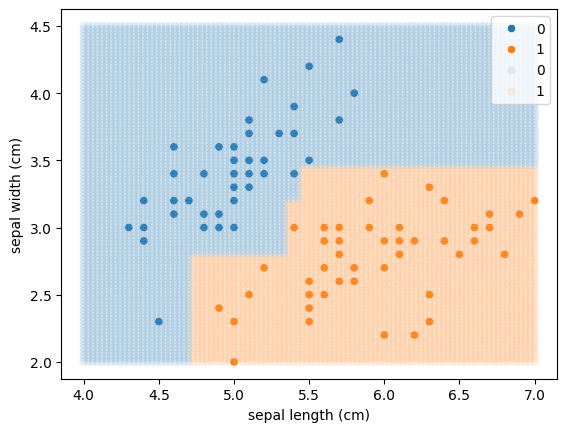

In [ ]:
_x = np.linspace(4, 7, 100)
_y = np.linspace(2, 4.5, 100)
xv, yv = np.meshgrid(_x, _y)
grid = np.vstack([xv.flatten(), yv.flatten()]).T
_pred = tree.predict(grid)

sns.scatterplot(x=train_X['sepal length (cm)'], y=train_X['sepal width (cm)'], hue=train_y)
sns.scatterplot(x=grid[:,0], y=grid[:,1], hue=_pred, alpha=0.1)


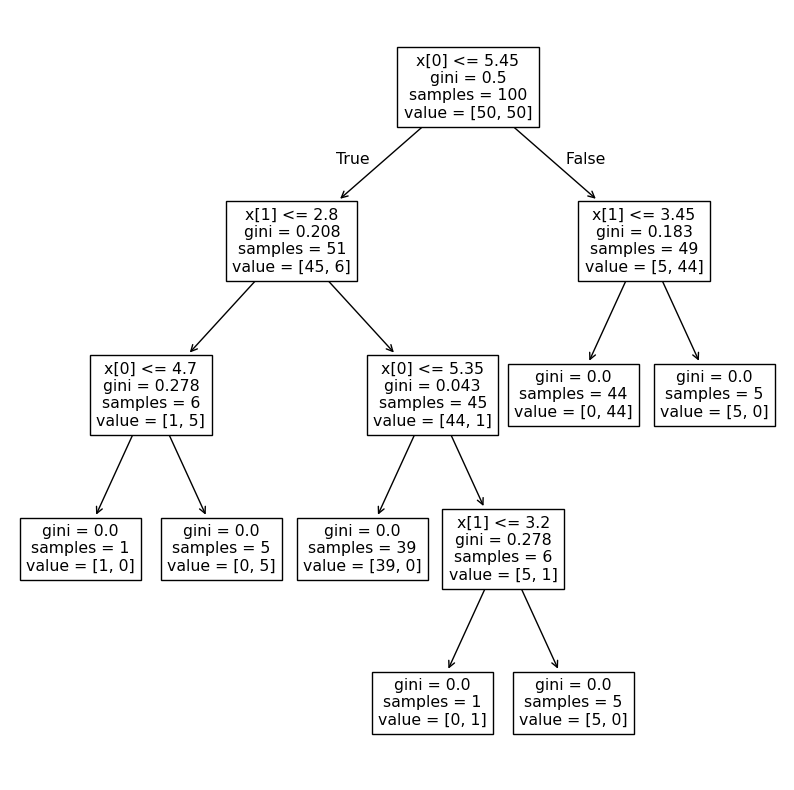

In [ ]:
plt.figure(figsize=(10, 10))
_ = plot_tree(tree)

### Регуляризация решающих деревьев
* max_depth - ограничение максимальной глубины дерева
* min_samples_leaf - минимальное кол-во объектов в листе
* min_samples_split - минимальное кол-во объектов в ноде, чтобы её можно было расщепить

In [ ]:
X = np.linspace(-1, 1, 100)
y = X**2
y += np.random.binomial(1, 0.1, size=100)*np.random.normal(scale=0.5, size=100)

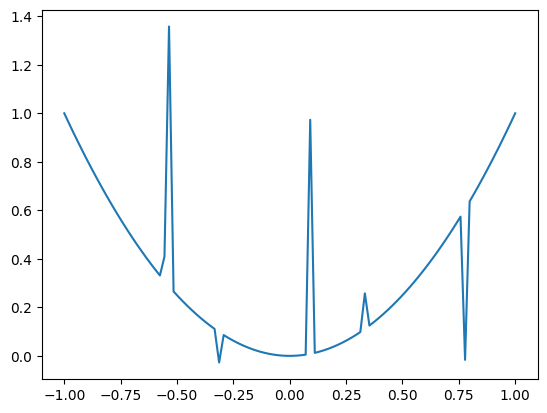

In [ ]:
plt.plot(X, y)

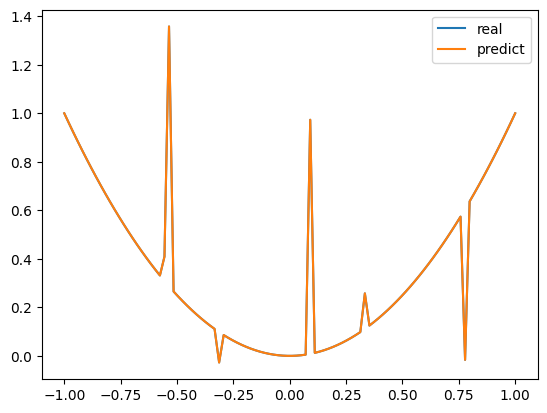

In [ ]:
regtree = DecisionTreeRegressor()
regtree.fit(X.reshape(-1, 1), y)
pred_y = regtree.predict(X.reshape(-1, 1))
plt.plot(X, y, label='real')
plt.plot(X, pred_y, label='predict')
plt.legend()

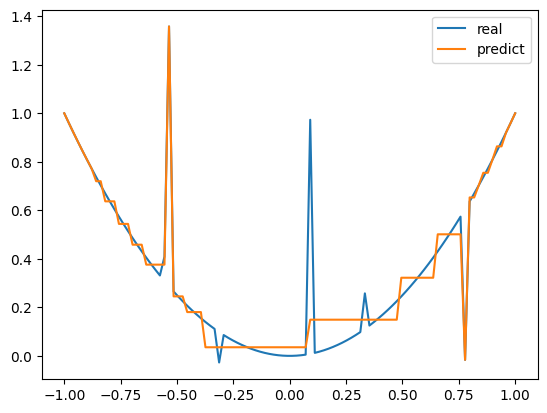

In [ ]:
regtree = DecisionTreeRegressor(max_depth=5)
regtree.fit(X.reshape(-1, 1), y)
pred_y = regtree.predict(X.reshape(-1, 1))
plt.plot(X, y, label='real')
plt.plot(X, pred_y, label='predict')
plt.legend()

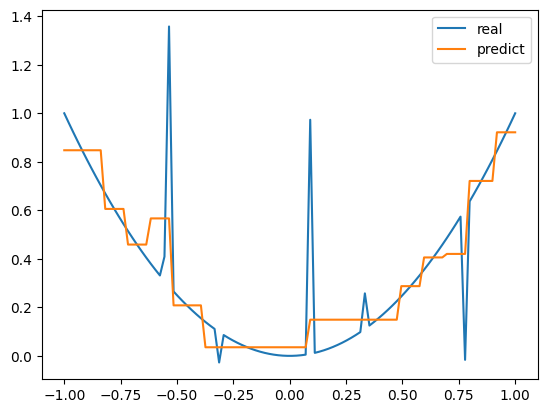

In [ ]:
regtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)
regtree.fit(X.reshape(-1, 1), y)
pred_y = regtree.predict(X.reshape(-1, 1))
plt.plot(X, y, label='real')
plt.plot(X, pred_y, label='predict')
plt.legend()